# Numerical integration

In this notebook we test several methods for the numerical integration.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

First of all, we define the methods to be used below:

In [3]:
def forward_euler(f, x):
    return (x[-1]-x[0])*f(x[0])

def backward_euler(f, x):
    return (x[-1]-x[0])*f(x[-1])

def midpoint_rule(f, x):
    return (x[-1]-x[0])*f((x[-1]+x[0])/2)

def trapezoidal_rule(f, x):
    return (x[-1]-x[0])*(f(x[0])/2 + f(x[-1])/2)

Then we define a convenient function to color the area below a function (i.e. plot the integral):

In [164]:
def plot_integral(x,f,alpha=1,label=None, hatch=None,facecolor=None):
    if facecolor is None:
        plt.fill_between(x, f(x), alpha=alpha, label=label, hatch=hatch)
    else:
        plt.fill_between(x, f(x), alpha=alpha, facecolor=facecolor, label=label, hatch=hatch)
    
def plot_extremes(a,b):
    for i in [a,b]:
        plt.plot([i, i], [0, i**2], linewidth=2, color='black')

Then we test (and visualize) each one on a simple case:

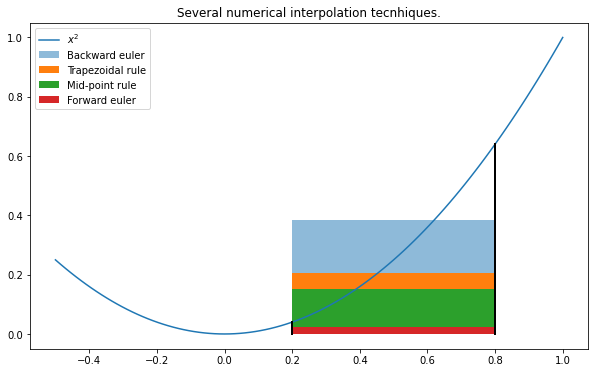

In [166]:
x = np.linspace(-0.5,1,100)

def f(x):
    return np.power(x,2)

a = 0.2
b = 0.8
int_x = np.linspace(a,b,50)

plt.figure(figsize=(10,6))

plot_integral(int_x, partial(backward_euler, f), alpha=0.5,label='Backward euler')
plot_integral(int_x, partial(trapezoidal_rule, f), label='Trapezoidal rule')
plot_integral(int_x, partial(midpoint_rule, f), label='Mid-point rule')
plot_integral(int_x, partial(forward_euler, f), label='Forward euler')

plt.plot(x, f(x), label='$x^2$')

plot_extremes(a,b)

plt.legend()
plt.title('Several numerical interpolation tecnhiques.');

## Integrating linear functions with the mid-point rule

When the extremes of the integration interval are located in such a way that $f(\frac{a+b}{2}) = 0$, the numerical integral computed using the _midpoint rule_ evaluates to zero. We observe that there are some cases in which this result is exact:

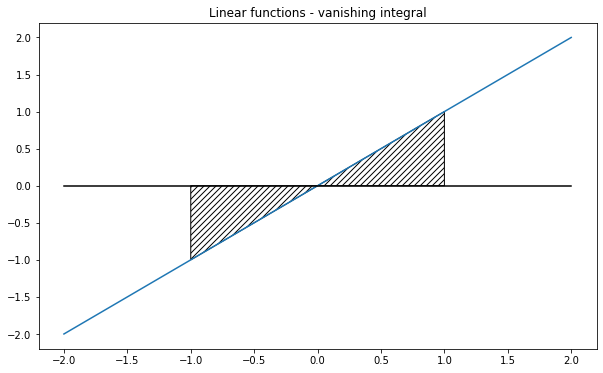

In [168]:
x = np.linspace(-2,2,100)
int_x = np.linspace(-1,1,100)

plt.figure(figsize=(10,6))

plt.title('Linear functions - vanishing integral')
plt.plot(x,x)
plt.plot(x,np.zeros(len(x)), color='black')

# does not appear in the image because it's zero
plot_integral(int_x, partial(midpoint_rule, f));

plot_integral(np.linspace(-1,1,50), lambda x: x, hatch='////', facecolor='none');

plt.show()

The sum of the highlighted area is clearly zero, therefore the value of the exact integral is zero.

Since:
1. Each function $p \in \mathbb{P}^1$ may be written as $p = kx + c$ with $k,c \in \mathbb{R}$;
2. We can clearly evaluate the integral of a constant function using the mid-point rule;
3. The integral is linear;
4. We can translate the function ($f_2(x) = f(x)+h$) in such a way that the mid-point lies in $x=0$;

we can integrate exactly any polynomial of $\mathbb{P}^1$.

## Integrating quadratic polynomials with two points

Our goal is to show that, in case we can choose freely the nodes on the x-axis in which the value of $f$ is known, the degree of accuracy of a method which uses $n$ nodes can reach $k(n) = 2n-1$. This clearly holds in the case of the mid-point rule ($n=1, k=1$ since we can compute exactly the integral of linear functions). We now see that this rule holds for quadratic polynomials.

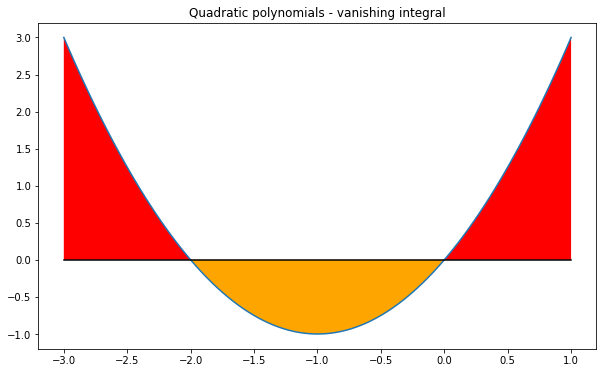

In [176]:
x = np.linspace(-3,1,100)

plt.figure(figsize=(10,6))

def f(x):
    return x**2+2*x

plt.title('Quadratic polynomials - vanishing integral')
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)), color='black')

plot_integral(np.linspace(-2,0,50), f, facecolor='orange');
plot_integral(np.linspace(0,1,50), f, facecolor='red');
plot_integral(np.linspace(-3,-2,50), f, facecolor='red');

plt.show()

It can be shown (analytically) that the sum of the red and orange area evaluates to zero. Therefore choosing the points $a_0 = -2, a_1 = 0$ gives us a zero numerical integral, which is the expected result.

Since any $p \in \mathbb{P}^2$ may be written as $p = \mathcal{I}^1 p + \alpha g$, where $g$ is a quadratic polynomial of the form shown in the figure above, i.e. its integral evaluates to zero on the given integration interval. Since $\mathcal{I}^1 p \in \mathbb{P}^1$ we already know how to integrate it. Therefore we know how to integrate $\mathcal{P}^2$.

## Integrating cubic polynomials with two points

Can we find a polynomial $q_3 \in \mathbb{P}^3$ s.t. $\texttt{Int}^2(q_3) = 0 = \texttt{Int}(q_3)$?

We consider a polynomial in $q_3 \in \mathbb{P}^3$ which is symmetric with respect to mid-point $\frac{a+b}{2}$, such that $q_3(a_0) = q_3(a_1) = 0$. Note that we consider only the value of the function in $a_0, a_1$, therefore we consider only two points.

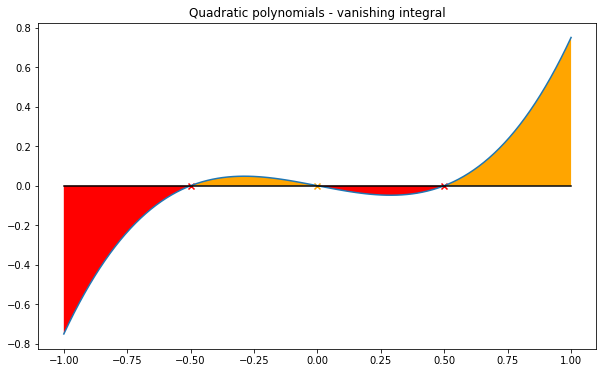

In [178]:
x = np.linspace(-1,1,100)

plt.figure(figsize=(10,6))

def f(x):
    return (x-1/2)*(x+1/2)*x

plt.title('Quadratic polynomials - vanishing integral')
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)), color='black')
plt.scatter([1/2, -1/2], [0,0], marker='x', color='red')
plt.scatter([0], [0], marker='x', color='orange')

plot_integral(np.linspace(-1,-1/2,50), f, facecolor='red');
plot_integral(np.linspace(-1/2,0,50), f, facecolor='orange');

plot_integral(np.linspace(1/2,1,50), f, facecolor='orange');
plot_integral(np.linspace(0,1/2,50), f, facecolor='red');

plt.show()

It can be shown that, as long as the function is symmetric with respect to the mid-point and it vanishes in the control points, the sum of the orange and red area evaluates to zero, therefore the exact integral is 0. Also the numerical integral evaluates to zero, since the known values of the function are two zeros.